# Exemplo: Problema do caixeiro viajante

Vizinho mais próximo randomizado, GRASP, Temperara Simulada, Busca local iterada.

In [1]:
# export
using NBInclude
using Printf
using Statistics: mean
using StatsBase

In [2]:
@nbinclude("D01-tsp-h1.ipynb"; regex=r"#\s*export")

bl_2ex (generic function with 1 method)

## Vizinho mais próximo randomizado

In [3]:
# export
function vmp_rnd(I::Instance,k)
    s = Solution([1],0.0)
    free = trues(I.n)
    free[1] = false
    for i = 2:I.n
        f = findall(free)
        ncand = min(k,I.n - i + 1)
        j = f[sortperm(I.D[s.π[end], f])[rand(1:ncand)]]
        s.v += I.D[s.π[end], j]
        push!(s.π, j)
        free[j] = false
    end
    s.v += I.D[s.π[end], 1]
    push!(s.π,1)
    s
end

vmp_rnd (generic function with 1 method)

In [4]:
s=vmp_rnd(I,3)

Solution([1, 488, 338, 358, 394, 28, 266, 341, 483, 150  …  79, 119, 386, 367, 348, 297, 328, 85, 411, 1], 34.79575156907853)

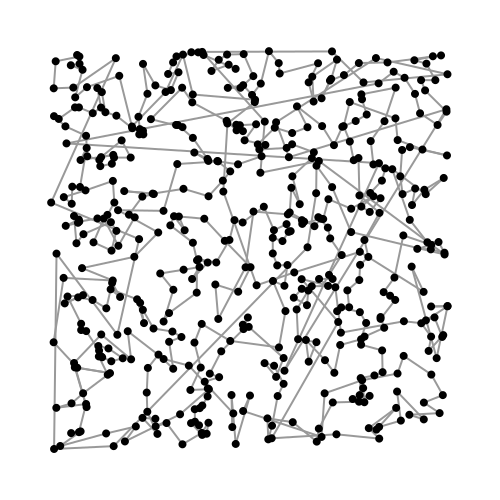

In [5]:
@png drawBoth(I,s) 500 500

## GRASP
(Cuidado: muito lento, deveria fazer 100 iterações/segundo.)

In [6]:
# export
function grasp(I)
    b = vmp(I)
    i = 1
    ii = 1
    printfmtln("I {:2} {} {:.3f} {:.3f}", i, i - ii, s.v, b.v)
    while i - ii < 50 
        s = vmp_rnd(I,2)
        s = bl_2ex(I,s)
        if s.v < b.v
            b = copy(s)
            ii = i
            printfmtln("* {:2} {} {:.3f} {:.3f}", i, i - ii, s.v, b.v)
        else
            printfmtln("  {:2} {} {:.3f} {:.3f}", i, i - ii, s.v, b.v)
        end
        i += 1
    end
    b

    end

grasp (generic function with 1 method)

In [7]:
b = grasp(I)
printfmtln("Best solution $(b.v).")

I 1  0 34.796 20.755
* 1  0 18.439 18.439
  2  1 18.453 18.439
  3  2 18.580 18.439
* 4  0 18.339 18.339
  5  1 18.470 18.339
  6  2 18.632 18.339
  7  3 18.775 18.339
* 8  0 18.152 18.152
  9  1 18.839 18.152
  10 2 18.584 18.152
  11 3 18.489 18.152
  12 4 18.432 18.152
  13 5 18.777 18.152
  14 6 18.686 18.152
  15 7 18.302 18.152
  16 8 18.364 18.152
  17 9 18.663 18.152
  18 10 18.596 18.152
  19 11 18.272 18.152
  20 12 18.332 18.152
  21 13 18.757 18.152
  22 14 18.739 18.152
  23 15 18.769 18.152
  24 16 18.305 18.152
  25 17 18.363 18.152
  26 18 18.167 18.152
  27 19 18.808 18.152
  28 20 18.550 18.152
  29 21 18.332 18.152
  30 22 18.197 18.152
  31 23 18.471 18.152
  32 24 18.554 18.152
  33 25 18.258 18.152
  34 26 18.514 18.152
  35 27 18.657 18.152
  36 28 18.313 18.152
  37 29 18.683 18.152
  38 30 18.630 18.152
  39 31 18.502 18.152
  40 32 18.416 18.152
  41 33 19.099 18.152
  42 34 18.691 18.152
  43 35 19.128 18.152
  44 36 19.058 18.152
  45 37 19.021 18.152
  46 3

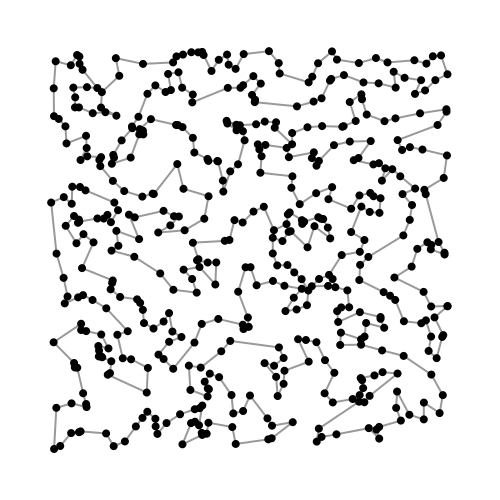

In [8]:
@png drawBoth(I,b) 500 500

## Tempera simulada

### Algoritmo Metropolis

In [9]:
# export
function Metropolis(I,s,L,T,best)
    for i = 1:L
        m = random_twoex(I.n)
        Δ = delta_2ex(I, s, m)
        # aceita condicionalmente
        if rand() < min(exp(-Δ / T), 1.0)
            move_2ex(s, m)
            if s.v < best.v
                best = copy(s)
            end
        end
    end
    (s,best)
end

function SimulatedAnnealing(I,s,L,r)
    best = copy(s)    
    ## (1) define uma temperatura inicial alta que aceita piorar pela distância média com prob. 1/e
    T = mean(I.D)
    ## (2) define uma temperatura final baixa que aceita piorar por 1/10 da distância mínima com prob. 1/e
    Tf = minimum([I.D[i,j] for i=1:I.n, j=1:I.n if i != j]) / 10
    printfmtln("Temperatura final: {:.6f}, logo {} iterações.", Tf, ceil(Int, log(r, Tf / T)))
    i = 1
    while T > Tf
        (s, best) = Metropolis(I, s, L, T, best)
        printfmtln("{:>3} T={:.3f} v={:.4f} b={:.3f}", i, T, s.v, best.v)
        T *= r
        i += 1
    end
    best
end

SimulatedAnnealing (generic function with 1 method)

In [10]:
best = SimulatedAnnealing(I,copy(vmp(I)),10*twoex_size(I.n),0.95)

Temperatura final: 0.000079, logo 172 iterações.
  1 T=0.522 v=206.3179 b=20.755
  2 T=0.496 v=210.3057 b=20.755
  3 T=0.471 v=203.5540 b=20.755
  4 T=0.447 v=201.6876 b=20.755
  5 T=0.425 v=199.8595 b=20.755
  6 T=0.404 v=200.2289 b=20.755
  7 T=0.384 v=197.9341 b=20.755
  8 T=0.364 v=187.9163 b=20.755
  9 T=0.346 v=186.8446 b=20.755
 10 T=0.329 v=183.2362 b=20.755
 11 T=0.312 v=182.7988 b=20.755
 12 T=0.297 v=178.9817 b=20.755
 13 T=0.282 v=181.4531 b=20.755
 14 T=0.268 v=169.1036 b=20.755
 15 T=0.255 v=160.4508 b=20.755
 16 T=0.242 v=161.1956 b=20.755
 17 T=0.230 v=151.7466 b=20.755
 18 T=0.218 v=147.2863 b=20.755
 19 T=0.207 v=150.9286 b=20.755
 20 T=0.197 v=142.9565 b=20.755
 21 T=0.187 v=134.8321 b=20.755
 22 T=0.178 v=134.4328 b=20.755
 23 T=0.169 v=124.2358 b=20.755
 24 T=0.160 v=116.3872 b=20.755
 25 T=0.152 v=112.8772 b=20.755
 26 T=0.145 v=114.3514 b=20.755
 27 T=0.138 v=116.5955 b=20.755
 28 T=0.131 v=105.1238 b=20.755
 29 T=0.124 v=102.5027 b=20.755
 30 T=0.118 v=101.4328 

Solution([1, 79, 44, 372, 357, 239, 102, 49, 363, 160  …  232, 46, 119, 150, 483, 341, 358, 338, 94, 1], 16.847017213497036)

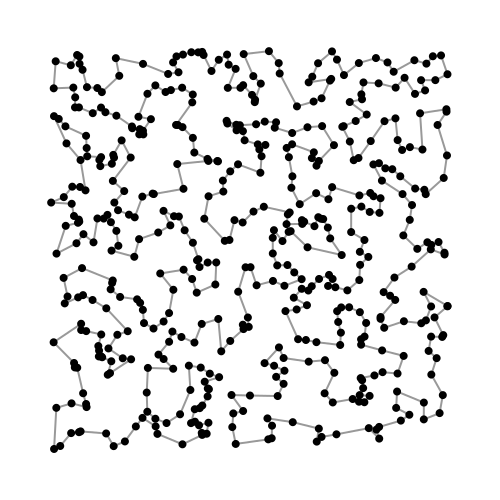

In [11]:
@png drawBoth(I, best) 500 500

## Busca local iterada

Amostragem de 4 cidades com distância pelo menos um entre eles. Isso é feito por amostragem de rejeição. Vamos selecionar 4 cidades aleatórios entre $1$ e $n-4$, o que tem $\binom{n-4}{4}$ possibilidades, inserer uma distância entre eles, e rejeitar caso não tem distância entre a primeira e última cidade. Um movimento é uma tupla $(m_1,m_2,m_3,m_4)$ de quatro cidades. Por convenção os arcos correspondentes são $(m_i,m_i+1)$.

In [12]:
# export
function delta_double_bridge(I, s, move)
    Δ = 0
    for i = 1:4
        Δ -= I.D[s.π[move[i]], s.π[move[i] + 1]]
    end
    for p in [(3,1), (2,4), (1,3), (4,2)]
        Δ += I.D[s.π[move[p[1]]], s.π[move[p[2]] + 1]]
    end
    Δ
end

function random_double_bridge(n)
    a = [1,2,3,n]
    while a[1] == 1 && a[4] == n
        a = sample(1:n-4,4,replace=false,ordered=true)
    end
    (a[1], a[2] + 1, a[3] + 2, a[4] + 3)
end

function move_double_bridge(I, s, move)
    s.v += delta_double_bridge(I, s, move)
    s.π = vcat(s.π[move[2]+1:move[3]],
         s.π[move[1]+1:move[2]],
         s.π[move[4]+1:end], s.π[1:move[1]],
         s.π[move[3]+1:move[4]]
    )
    s
end

move_double_bridge (generic function with 1 method)

### Variante simples

Uma busca local iterada simples. Ela aplica uma perturbação em cada mínimo local.

In [13]:
# export
function ils(I, s)
    best = copy(s)
    s = bl_2ex(I, s)
    i = ii = 1
    printfmtln("I {:2} {:2} {:.3f} {:.3f}", i, i - ii, s.v, best.v)
    while i - ii < 100
        s = move_double_bridge(I, s, random_double_bridge(I.n))
        s = bl_2ex(I, s)
        if s.v < best.v
            best = copy(s)
            ii = i
            printfmtln("* {:2} {:2} {:.3f} {:.3f}", i, i - ii, s.v, best.v)
        else
            printfmtln("  {:2} {:2} {:.3f} {:.3f}", i, i - ii, s.v, best.v)
        end
        i += 1
    end
    best
end

ils (generic function with 1 method)

In [14]:
ils(I, copy(vmp(I)))

I 1  0  17.640 20.755
* 1  0  17.702 17.702
  2  1  17.914 17.702
  3  2  17.993 17.702
  4  3  17.914 17.702
  5  4  17.988 17.702
  6  5  18.662 17.702
  7  6  18.485 17.702
  8  7  18.770 17.702
  9  8  19.007 17.702
  10 9  18.900 17.702
  11 10 18.618 17.702
  12 11 18.644 17.702
  13 12 18.544 17.702
  14 13 18.667 17.702
  15 14 18.830 17.702
  16 15 18.696 17.702
  17 16 18.616 17.702
  18 17 19.127 17.702
  19 18 19.051 17.702
  20 19 19.199 17.702
  21 20 19.038 17.702
  22 21 19.603 17.702
  23 22 19.325 17.702
  24 23 19.004 17.702
  25 24 19.002 17.702
  26 25 19.012 17.702
  27 26 19.184 17.702
  28 27 19.423 17.702
  29 28 19.499 17.702
  30 29 19.293 17.702
  31 30 19.256 17.702
  32 31 19.272 17.702
  33 32 19.173 17.702
  34 33 19.213 17.702
  35 34 18.843 17.702
  36 35 18.994 17.702
  37 36 18.878 17.702
  38 37 19.077 17.702
  39 38 19.251 17.702
  40 39 19.223 17.702
  41 40 19.499 17.702
  42 41 19.353 17.702
  43 42 19.543 17.702
  44 43 19.209 17.702
  45 44 19

Solution([312, 442, 203, 225, 362, 22, 474, 162, 421, 40  …  410, 223, 142, 149, 90, 405, 393, 497, 9, 312], 17.702357085451716)

### Variante com critério de aceitação

Uma busca local iterada com o critério de Metropolis de aceitação.

In [15]:
# export
function ils_accept(I,s,T)
    best = copy(s)
    s = bl_2ex(I,s)
    i = ii = 1
    printfmtln("I {:3} {:>2} {:.3f} {:.3f}", i, i - ii, s.v, best.v)
    while i - ii < 100
        i += 1
        s₀ = copy(s)
        s = move_double_bridge(I, s, random_double_bridge(I.n))
        s = bl_2ex(I,s)
        if s.v < best.v
            best = copy(s)
            ii = i
            printfmtln("* {:3} {:>2} {:.3f} {:.3f}", i, i - ii, s.v, best.v)
        elseif s.v < s₀.v || rand() > min(exp(-(s.v - s₀.v) / T), 1.0)
            printfmtln("A {:3} {:>2} {:.3f} {:.3f}", i, i - ii, s.v, best.v)
            s = copy(s₀)
        else
            printfmtln("R {:3} {:>2} {:.3f} {:.3f}", i, i - ii, s.v, best.v)
        end
    end
    best
end

ils_accept (generic function with 1 method)

In [16]:
ils_accept(I,copy(vmp(I)), 1)

I 1    0 17.640 20.755
* 2    0 18.009 18.009
* 3    0 17.866 17.866
R 4    1 18.007 17.866
A 5    2 18.453 17.866
A 6    3 18.376 17.866
R 7    4 18.012 17.866
R 8    5 18.335 17.866
A 9    6 18.775 17.866
R 10   7 18.469 17.866
A 11   8 18.296 17.866
R 12   9 18.651 17.866
A 13  10 18.486 17.866
R 14  11 18.737 17.866
R 15  12 18.760 17.866
A 16  13 18.739 17.866
A 17  14 18.631 17.866
R 18  15 18.889 17.866
R 19  16 19.002 17.866
R 20  17 19.185 17.866
R 21  18 19.294 17.866
A 22  19 18.821 17.866
R 23  20 19.324 17.866
A 24  21 19.143 17.866
A 25  22 18.869 17.866
A 26  23 19.319 17.866
A 27  24 19.300 17.866
A 28  25 18.936 17.866
A 29  26 18.908 17.866
A 30  27 18.923 17.866
A 31  28 18.934 17.866
A 32  29 19.133 17.866
A 33  30 19.133 17.866
R 34  31 19.356 17.866
A 35  32 19.241 17.866
R 36  33 19.421 17.866
A 37  34 19.243 17.866
A 38  35 19.271 17.866
R 39  36 19.752 17.866
A 40  37 19.700 17.866
A 41  38 19.658 17.866
A 42  39 19.580 17.866
R 43  40 19.756 17.866
R 44  41 19

Solution([389, 310, 233, 355, 20, 485, 295, 218, 212, 255  …  371, 27, 148, 267, 168, 136, 202, 487, 450, 389], 17.865966612268156)